In [3]:
import os
import pyarrow.parquet as pq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


abandoned_df = pq.read_table("Datasets_Zrive/abandoned_carts.parquet").to_pandas()
inventory_df = pq.read_table("Datasets_Zrive/inventory.parquet").to_pandas()
orders_df = pq.read_table("Datasets_Zrive/orders.parquet").to_pandas()
regulars_df = pq.read_table("Datasets_Zrive/regulars.parquet").to_pandas()
users_df = pq.read_table("Datasets_Zrive/users.parquet").to_pandas()

datasets = [abandoned_df, inventory_df, orders_df, regulars_df, users_df]

In [4]:
for i in datasets:
    print(i.isna().sum())

id            0
user_id       0
created_at    0
variant_id    0
dtype: int64
variant_id          0
price               0
compare_at_price    0
vendor              0
product_type        0
tags                0
dtype: int64
id                0
user_id           0
created_at        0
order_date        0
user_order_seq    0
ordered_items     0
dtype: int64
user_id       0
variant_id    0
created_at    0
dtype: int64
user_id                     0
user_segment                0
user_nuts1                 51
first_ordered_at            0
customer_cohort_month       0
count_people             4658
count_adults             4658
count_children           4658
count_babies             4658
count_pets               4658
dtype: int64


In [5]:
users_df

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3011,2c0eaa81411d8796e4e28a1a13265aa773e815d83e6db1...,Proposition,UKH,2022-01-18 10:10:39,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4343,bf8da3ba3538396b70564a49f55f26303af645a0fe32fa...,Top Up,UKI,2021-11-02 09:24:55,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2725,b1892f28d8bb191138ec1f098a8e229c16755f2616aea0...,Top Up,UKM,2021-06-10 12:46:07,2021-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4340,2745667201081b389e4b290565d17651b3eb94d9077183...,Proposition,UKI,2021-01-10 11:07:16,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [6]:
users_df.user_nuts1.value_counts()

user_nuts1
UKI    1318
UKJ     745
UKK     602
UKH     414
UKD     358
UKM     315
UKE     303
UKG     295
UKF     252
UKL     224
UKC     102
UKN       4
Name: count, dtype: int64

In [7]:
users_df.count_people.value_counts()

count_people
2.0    97
3.0    68
4.0    67
1.0    57
5.0    24
6.0     8
0.0     2
7.0     1
8.0     1
Name: count, dtype: int64

In [8]:
users_df[users_df['count_adults'].notnull()]

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3669,2af3b4045f9720d7ecff437c541235a9cffc5d970e819d...,Top Up,UKI,2020-11-23 13:39:49,2020-11-01 00:00:00,5.0,2.0,3.0,0.0,0.0
1896,9d04b5e14e261ceeeff21ff4da607a5ffd893cb1df3947...,Top Up,UKH,2021-04-08 08:08:29,2021-04-01 00:00:00,1.0,1.0,0.0,0.0,0.0
834,83e6fbcad49822b289f2fb425f973f48d0684dec6cbab4...,Top Up,UKK,2020-08-23 10:30:29,2020-08-01 00:00:00,3.0,2.0,1.0,0.0,0.0
2927,84db2fef5efda066b372af2c93419262dab69f40bb2f94...,Proposition,UKF,2020-08-22 03:51:23,2020-08-01 00:00:00,2.0,1.0,1.0,0.0,1.0


In [9]:
for i in datasets:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage

In [10]:
orders_df.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [11]:
regulars_df.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [12]:
users_df[users_df['user_nuts1'].isnull()].head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
1145,8afa3289c56fd4225f42bd3427615204eca9fea9e46261...,Top Up,None,2021-09-27 16:42:50,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1858,361235e2decd78440db688cc8ca0abf6ec6725dd5a2e6c...,Proposition,None,2021-11-26 13:19:47,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
3884,e99c9a29e3d1fc49649568cc5625a23b2aa8e3a4577527...,Top Up,None,2022-02-21 12:50:19,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4573,e5ff40c78b3cdcf2b10c9dc69e5e893d95246741300f26...,Proposition,None,2020-05-30 13:28:27,2020-05-01 00:00:00,4.0,3.0,1.0,0.0,2.0
12992,b34e8a5c1464868734143e3e3b49d951e8dc7efb346852...,Proposition,None,2021-05-23 17:56:47,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [13]:
users_df = users_df.dropna(subset=['user_nuts1'])

In [14]:
regulars_df.variant_id.value_counts()

variant_id
34081589887108    253
34370361229444    127
33973249081476    114
34370915041412    112
34284951863428    105
                 ... 
39544243552388      1
39478260826244      1
39711187894404      1
39272601452676      1
39459281010820      1
Name: count, Length: 1843, dtype: int64

In [15]:


def value_count_to_df(items: pd.DataFrame) -> pd.DataFrame:
    items = items.to_numpy()
    count_orders = {}
    for i in items:
        for j in i:
            if j in count_orders:
                count_orders[j] += 1
            else:
                count_orders[j] = 1

    return pd.DataFrame(list(count_orders.items()), columns=['variant_id','count'])


count_orders_df = value_count_to_df(orders_df['ordered_items']).rename(columns={'count': 'Count_Orders'})
count_abandoned_orders_df = value_count_to_df(abandoned_df['variant_id']).rename(columns={'count': 'Count_Abandoned_Orders'})


In [ ]:
value_count_to_df()

In [16]:
count_orders_df.columns

Index(['variant_id', 'Count_Orders'], dtype='object')

In [17]:
orders_summary_df

NameError: name 'orders_summary_df' is not defined

In [ ]:
regulars_value_counts = pd.DataFrame(regulars_df.variant_id.value_counts()).rename(columns={'count': 'Count_Regulars'})

orders_summary_df = count_orders_df.merge(regulars_value_counts, on='variant_id', how='left')
orders_summary_df = orders_summary_df.merge(count_abandoned_orders_df, on='variant_id', how='left')
orders_summary_df.fillna(0,inplace=True)
orders_summary_df = orders_summary_df.merge(inventory_df, on='variant_id', how='left')
orders_summary_df.sort_values(by='Count_Orders',ascending=False,inplace=True)
orders_summary_df.reset_index(drop=True, inplace=True)
orders_summary_df['Count_Regulars'] = orders_summary_df['Count_Regulars'].astype('int16')
orders_summary_df['Count_Abandoned_Orders'] = orders_summary_df['Count_Abandoned_Orders'].astype('int16')
orders_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   variant_id              2117 non-null   int64  
 1   Count_Orders            2117 non-null   int64  
 2   Count_Regulars          2117 non-null   int16  
 3   Count_Abandoned_Orders  2117 non-null   int16  
 4   price                   1477 non-null   float64
 5   compare_at_price        1477 non-null   float64
 6   vendor                  1477 non-null   object 
 7   product_type            1477 non-null   object 
 8   tags                    1477 non-null   object 
dtypes: float64(2), int16(2), int64(2), object(3)
memory usage: 124.2+ KB


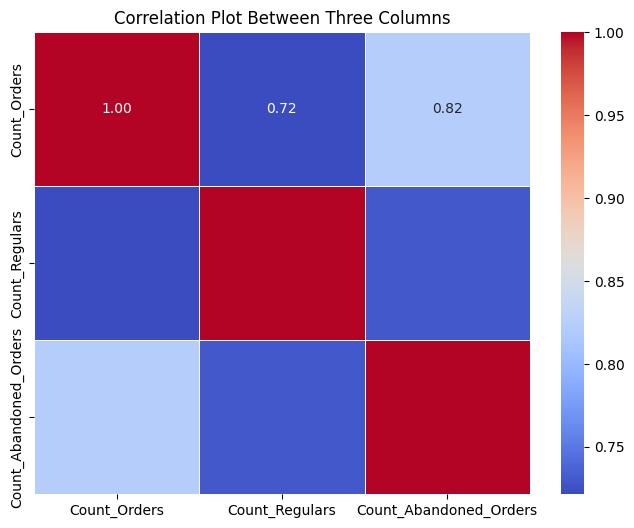

In [ ]:
correlation_matrix = orders_summary_df.iloc[:,1:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Plot Between Three Columns')
plt.show()

In [ ]:
inventory_df

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]
...,...,...,...,...,...,...
1728,39539419218052,4.99,5.99,bother,,[household-sundries]
1729,34534187368580,4.69,5.49,tommeetippee,baby-accessories,[feeding-weaning]
1730,33826439594116,15.39,17.15,colief,baby-accessories,[feeding-weaning]
1731,33667214508164,19.49,21.65,enterosgel,medicines-treatments,"[discontinue, first-aid]"


In [ ]:
orders_df['year'] = orders_df['order_date'].dt.year
orders_df.groupby(by='year').count()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
year,,,,,,
2020,740,740,740,740,740,740
2021,5784,5784,5784,5784,5784,5784
2022,2249,2249,2249,2249,2249,2249


,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"
...,...,...,...,...
70036,22233840976004,2e989bfdec87ef55ea464a529f323ff53dad2a2fc48655...,2022-03-13 14:11:15,"[34284950192260, 39466620911748]"
70041,22233843171460,b2d867b982b14ca517f27c4ced727c8a25c01b96ebbd96...,2022-03-13 14:11:36,"[39536607395972, 39506484461700]"
70043,22233843531908,220aafc0749f209b3f0f7cfe4134a5136815d48f0bbd9a...,2022-03-13 14:11:41,"[39482337624196, 39544243650692]"
70049,22233846218884,a4da55d51052411e54f98e1b90b19843121866abeaea76...,2022-03-13 14:12:09,"[34415989325956, 33667297017988, 3948233762419..."


In [ ]:
regulars_value_counts

,Item_ID,Number_Regular


variant_id
34081589887108    253
34370361229444    127
33973249081476    114
34370915041412    112
34284951863428    105
                 ... 
39544243552388      1
39478260826244      1
39711187894404      1
39272601452676      1
39459281010820      1
Name: count, Length: 1843, dtype: int64

dict_items([(33618849693828, 1), (33618860179588, 1), (33618874040452, 2), (33618907005060, 2), (33618923061380, 1), (33618937544836, 1), (33618956746884, 2), (33618967036036, 3), (33618967560324, 1), (33618979389572, 1), (33618981421188, 1), (33618997379204, 1), (33618835243140, 1), (33618835964036, 1), (33618862440580, 1), (33618882822276, 1), (33618895732868, 1), (33618902450308, 1), (33618905202820, 2), (33618905825412, 1), (33618906579076, 1), (33618909495428, 1), (33618948522116, 1), (33618957041796, 1), (33618962284676, 1), (33618963857540, 1), (33618972704900, 1), (33618995413124, 2), (33618995445892, 1), (33618996723844, 1), (33618997805188, 1), (33619008749700, 1), (33619009470596, 1), (33619012288644, 1), (33618891145348, 1), (33618893570180, 1), (33618897666180, 2), (33618905923716, 1), (33618950357124, 1), (33618968641668, 1), (33618976342148, 1), (33618977095812, 1), (33618996592772, 1), (33618998853764, 1), (33618998919300, 1), (33619002556548, 1), (33618830196868, 1), (

In [ ]:
orders_df['ordered_items_len']

10       8773
20       8773
21       8773
34       8773
49       8773
         ... 
64396    8773
64488    8773
64499    8773
64523    8773
64538    8773
Name: ordered_items_len, Length: 8773, dtype: int64